## Data Exploration 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from prepro import readfile, get_sentence, get_label, get_all, get_corpus

In [2]:
train = readfile("train.txt")
test = readfile("test.txt")

In [3]:
def print_head(dataset,sentence_number):
    data = get_all(dataset,sentence_number)
    words =[]
    pos =[]
    chunk = []
    ner =[]
    for i in data:
        words.append(i[0])
        pos.append(i[-1])
        ner.append(i[1])
        chunk.append(i[-2])
        
    df = pd.DataFrame(words, columns=['Words'])
    df["POS"] = pos
    df["NER"] = ner
    df["Chunk"] = chunk
    return(print(df))
    
print_head(train,1)   

     Words  POS     NER Chunk
0       EU  NNP   B-ORG  B-NP
1  rejects  VBZ       O  B-VP
2   German   JJ  B-MISC  B-NP
3     call   NN       O  I-NP
4       to   TO       O  B-VP
5  boycott   VB       O  I-VP
6  British   JJ  B-MISC  B-NP
7     lamb   NN       O  I-NP
8        .    .       O     O


In [4]:
#print out the fist sentence
def print_sentence(sentence_number):
    #use list comprehensions to print the sentence with entity tags
    print("".join(['{:10}'.format(word[0]) for word in train[sentence_number-1]]))
    print("".join(['{:10}'.format(word[1]) for word in train[sentence_number-1]]))

print_sentence(1)

EU        rejects   German    call      to        boycott   British   lamb      .         
B-ORG     O         B-MISC    O         O         O         B-MISC    O         O         


## Properties of the Data

In [5]:
sentences =[len(train), len(test)]
tokens = [get_corpus(train)[0],get_corpus(test)[0]]
uni =[get_corpus(train)[1],get_corpus(test)[1]]

In [20]:
df=pd.DataFrame(sentences, columns=["Sentences"])
df['Tokens']=tokens
df['Unique Words'] =uni
df= df.transpose()
df.columns =["Train", "Test"]
df

,Train,Test
Sentences,14041,3453
Tokens,203621,46435
Unique Words,23623,9488


In [59]:
#What is the most popular entity - Entity counter

def count_entities(train):
    entities = []
    for sentence in train:
        for word in sentence:
            entities.append(word[1])
    return(Counter(entities))

def unpack_dic(dic1,dic2):
    loc = [dic1["I-LOC"] + dic1["B-LOC"],dic2["I-LOC"] + dic2["B-LOC"]]
    org = [dic1["B-ORG"] + dic1["I-ORG"],dic2["B-ORG"] + dic2["I-ORG"]]
    per = [dic1["I-PER"] + dic1["B-PER"],dic2["I-PER"] + dic2["B-PER"]]
    mis = [dic1["B-MISC"] + dic1["I-MISC"],dic2["B-MISC"] + dic2["I-MISC"]]
    
    df = pd.DataFrame(loc, columns=["LOC"])
    df['ORG']=org
    df['PER'] =per
    df['MISC']= mis
    df.rename(index={0:'Train',1:'Test'}, inplace=True)
    return(df)

train_dic= count_entities(train)
test_dic = count_entities(test)
unpack_dic(train_dic, test_dic)

,LOC,ORG,PER,MISC
Train,8297,10025,11128,4593
Test,1925,2496,2773,918


In [7]:
#get data on sentence length
sentences_len = []
for sentence in train:
    sentences_len.append(len(sentence))

#training set
print("The average length of sentences is %s words" %round((sum(sentences_len)/len(train))))
print("The longest senetence has %s words" %max(sentences_len))
print("The shortest senetence has %s word" %min(sentences_len))

The average length of sentences is 15 words
The longest senetence has 113 words
The shortest senetence has 1 word


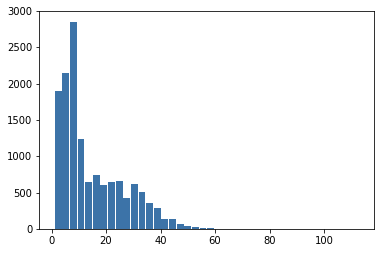

In [9]:
#Show the distribution of sentence length
plt.hist(sentences_len,bins=40, rwidth=0.9,
                   color='#3c73a8',log=False)
plt.show()

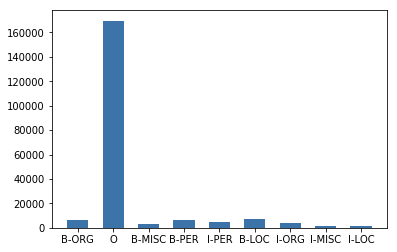

In [18]:
labels, values = zip(*Counter(entities).items())
indexes = np.arange(len(labels))
width=0.6
plt.bar(indexes, values, width, color='#3c73a8')
plt.xticks(indexes + width * 0.0, labels)
plt.show()